Clustering Part 1

***

In [1]:
#pip install -U scikit-learn scipy matplotlib

In [2]:
import sklearn
import warnings
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler


# ignore warnings
warnings.filterwarnings('ignore')

# float format
pd.options.display.float_format = '{:,}'.format

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Load data

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VVNM/data_cleaning.csv', header=0, sep = ',')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cleaning.csv', header=0, sep = ',')

data = data.drop(["Unnamed: 0"], axis = 1)
data.shape


(1697179, 15)

In [5]:
# check NAs  
data.isna().sum()

USER_KEY             0
USER_NAME            0
USER_AGE             0
USER_SEX             0
VIEW_DATE            0
ASSET_TYPE           0
ASSET_CATEGORY       0
SRC_GENRE_DESC       0
CHANNEL              0
ASSET_NAME           0
PRG_DURATION_MIN     0
VIEW_DURATION_MIN    0
VIEWERSHIP_KEY       0
ASSET_KEY            0
VIEW_RATING          0
dtype: int64

In [6]:
# Create dictionary with USER_KEY as keys and USER_NAME as values

users_dict = pd.Series(data.USER_NAME.values,index=data.USER_KEY).to_dict()
#users_dict

In [7]:
# Show names of columns

data.columns

Index(['USER_KEY', 'USER_NAME', 'USER_AGE', 'USER_SEX', 'VIEW_DATE',
       'ASSET_TYPE', 'ASSET_CATEGORY', 'SRC_GENRE_DESC', 'CHANNEL',
       'ASSET_NAME', 'PRG_DURATION_MIN', 'VIEW_DURATION_MIN', 'VIEWERSHIP_KEY',
       'ASSET_KEY', 'VIEW_RATING'],
      dtype='object')

In [8]:
# Convert VIEW_DATE from object to DATETIME64 type
data['VIEW_DATE'] = pd.to_datetime(data['VIEW_DATE'])

# Convert PRG_DURATION_MIN , VIEW_DURATION_MIN  from object to float type
data["PRG_DURATION_MIN"]=data["PRG_DURATION_MIN"].str.replace(',','.')
data["VIEW_DURATION_MIN"]=data["VIEW_DURATION_MIN"].str.replace(',','.')
data['VIEW_DURATION_MIN'] = data['VIEW_DURATION_MIN'].astype(float)
data['PRG_DURATION_MIN'] = data['PRG_DURATION_MIN'].astype(float)

data.dtypes

USER_KEY                      int64
USER_NAME                    object
USER_AGE                      int64
USER_SEX                     object
VIEW_DATE            datetime64[ns]
ASSET_TYPE                   object
ASSET_CATEGORY               object
SRC_GENRE_DESC               object
CHANNEL                      object
ASSET_NAME                   object
PRG_DURATION_MIN            float64
VIEW_DURATION_MIN           float64
VIEWERSHIP_KEY                int64
ASSET_KEY                     int64
VIEW_RATING                   int64
dtype: object

In [9]:
# Feauture engineering - get the day name 
data['VIEW_DAY'] = data['VIEW_DATE'].dt.day_name()
data.shape

(1697179, 16)

In [10]:
data.columns

Index(['USER_KEY', 'USER_NAME', 'USER_AGE', 'USER_SEX', 'VIEW_DATE',
       'ASSET_TYPE', 'ASSET_CATEGORY', 'SRC_GENRE_DESC', 'CHANNEL',
       'ASSET_NAME', 'PRG_DURATION_MIN', 'VIEW_DURATION_MIN', 'VIEWERSHIP_KEY',
       'ASSET_KEY', 'VIEW_RATING', 'VIEW_DAY'],
      dtype='object')

In [11]:
# create a copy of the original df to extract the columns 
data_copy = data.copy()

numerical_features = data_copy[['USER_AGE','PRG_DURATION_MIN','VIEW_DURATION_MIN']]
categorical_features = data_copy[['USER_SEX','ASSET_TYPE','ASSET_CATEGORY','SRC_GENRE_DESC','VIEW_DAY']]
ordinal_feautures = data_copy[["VIEW_RATING"]]

In [12]:
numerical_features.head(5)

,USER_AGE,PRG_DURATION_MIN,VIEW_DURATION_MIN
0,73,115.0,17.5
1,73,15.0,12.83
2,30,130.0,23.27
3,29,130.0,73.95
4,81,72.891,56.07


In [13]:
categorical_features.head(5)

,USER_SEX,ASSET_TYPE,ASSET_CATEGORY,SRC_GENRE_DESC,VIEW_DAY
0,F,LIVE TV,SPORTS,SPORTS-LIVE,Friday
1,F,TSTV,SPORTS,SPORTS-LIVE,Friday
2,F,LIVE TV,SPORTS,SPORTS-LIVE,Friday
3,M,LIVE TV,SPORTS,SPORTS-LIVE,Friday
4,M,VOD,MOVIES,COMEDY,Friday


In [14]:
ordinal_feautures.head(5)

,VIEW_RATING
0,1
1,4
2,1
3,3
4,4


In [15]:
#pip install matplotlib==3.1.3

Text(0.5, 0.98, 'Histogram plots for all numeric variables')

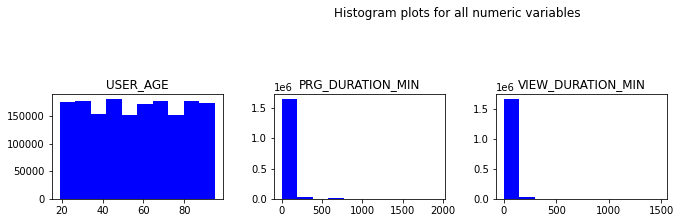

In [16]:
# check normality of the numeric feautures 
from matplotlib import _png

numerical_features.hist(layout = (5,4), color = "blue", figsize = (15,12), grid = False)
plt.suptitle("Histogram plots for all numeric variables")

Text(0.5, 1.0, 'Boxplots for all numeric variables')

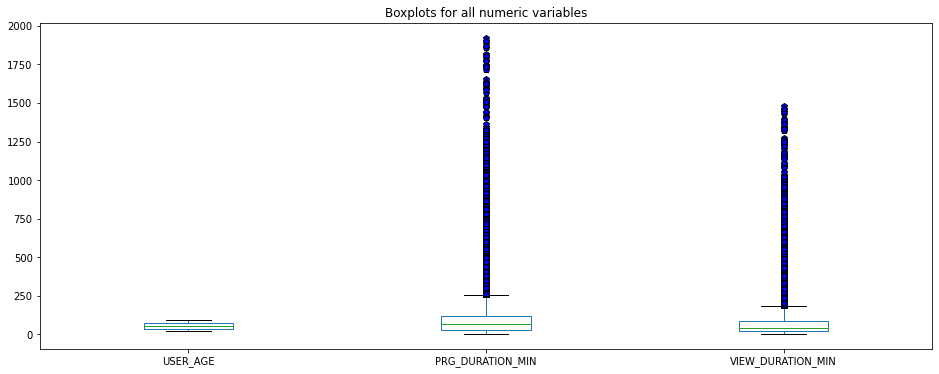

In [17]:
# boxplots 

bit = dict(markerfacecolor = "b", marker = "p")
boxplot = numerical_features.boxplot(figsize = (16,6), grid = False, flierprops = bit)
plt.title("Boxplots for all numeric variables")


In [18]:
# Normality tests - Shapiro-Wilk test

for i in numerical_features.columns:
    print([i])
    a,b = stats.shapiro(numerical_features[i])
    print("Statistics", a, "p-value", b)
    
    # p-value criteria  
    if b < a: 
        print("The null hypothesis can be rejected , thus the sample does not come from a normal distribution")
    else: 
        print("The null hypothesis cannot be rejected , thus the sample come from a normal distribution")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

['USER_AGE']
Statistics 0.956683874130249 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['PRG_DURATION_MIN']
Statistics 0.6694164276123047 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['VIEW_DURATION_MIN']
Statistics 0.8706836104393005 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [19]:
# Feauture engineering for categorical_features
categorical_features_dummies = pd.get_dummies(categorical_features)
print(categorical_features_dummies.shape)
categorical_features_dummies.head(5)

(1697179, 87)


,USER_SEX_F,USER_SEX_M,ASSET_TYPE_CATCHUP TV,ASSET_TYPE_LIVE TV,ASSET_TYPE_TSTV,ASSET_TYPE_VOD,ASSET_CATEGORY_CHRISTMAS TIME,ASSET_CATEGORY_DOCUMENTARIES,ASSET_CATEGORY_KIDS,"ASSET_CATEGORY_KIDS,MOVIES",ASSET_CATEGORY_MOVIES,ASSET_CATEGORY_Not Available,ASSET_CATEGORY_SERIES,ASSET_CATEGORY_SHOWS,ASSET_CATEGORY_SPORTS,SRC_GENRE_DESC_ACTION,"SRC_GENRE_DESC_ACTION,ADVENTURE","SRC_GENRE_DESC_ACTION,COMEDY","SRC_GENRE_DESC_ACTION,CRIME","SRC_GENRE_DESC_ACTION,FANTASY","SRC_GENRE_DESC_ACTION,MYSTERY","SRC_GENRE_DESC_ACTION,ROMANTIC COMEDY","SRC_GENRE_DESC_ACTION,SCIFI","SRC_GENRE_DESC_ACTION,THRILLER","SRC_GENRE_DESC_ACTION,WAR",SRC_GENRE_DESC_ADVENTURE,"SRC_GENRE_DESC_ADVENTURE,COMEDY","SRC_GENRE_DESC_ADVENTURE,FAMILY","SRC_GENRE_DESC_ADVENTURE,FANTASY","SRC_GENRE_DESC_ADVENTURE,MYSTERY","SRC_GENRE_DESC_ADVENTURE,SCIFI","SRC_GENRE_DESC_ADVENTURE,THRILLER",SRC_GENRE_DESC_ANIMATION,"SRC_GENRE_DESC_ANIMATION,KIDS",SRC_GENRE_DESC_COMEDY,SRC_GENRE_DESC_COMEDY DRAMA,"SRC_GENRE_DESC_COMEDY,CRIME","SRC_GENRE_DESC_COMEDY,FAMILY","SRC_GENRE_DESC_COMEDY,FANTASY",SRC_GENRE_DESC_COOKING,...,SRC_GENRE_DESC_DRAMA,SRC_GENRE_DESC_FAMILY,SRC_GENRE_DESC_FANTASY,"SRC_GENRE_DESC_FANTASY,ROMANCE",SRC_GENRE_DESC_HISTORY,SRC_GENRE_DESC_HORROR,"SRC_GENRE_DESC_HORROR,MYSTERY","SRC_GENRE_DESC_HORROR,TRUE STORY",SRC_GENRE_DESC_KIDS,"SRC_GENRE_DESC_KIDS,LIVE ACTION",SRC_GENRE_DESC_LIVE ACTION,SRC_GENRE_DESC_MEDICAL DRAMA,SRC_GENRE_DESC_MUSICAL,SRC_GENRE_DESC_MYSTERY,"SRC_GENRE_DESC_MYSTERY,ROMANCE","SRC_GENRE_DESC_MYSTERY,SCIFI","SRC_GENRE_DESC_MYSTERY,THRILLER",SRC_GENRE_DESC_REALITY SHOW,SRC_GENRE_DESC_ROMANCE,SRC_GENRE_DESC_ROMANTIC COMEDY,SRC_GENRE_DESC_SCIFI,"SRC_GENRE_DESC_SCIFI,THRILLER",SRC_GENRE_DESC_SHOW,SRC_GENRE_DESC_SOCIAL,"SRC_GENRE_DESC_SOCIAL,SPORT",SRC_GENRE_DESC_SPORT,SRC_GENRE_DESC_SPORTS-LIVE,SRC_GENRE_DESC_TALENT SHOW,SRC_GENRE_DESC_THRILLER,SRC_GENRE_DESC_TRUE STORY,SRC_GENRE_DESC_UNKNOWN,SRC_GENRE_DESC_WAR,SRC_GENRE_DESC_WESTERN,VIEW_DAY_Friday,VIEW_DAY_Monday,VIEW_DAY_Saturday,VIEW_DAY_Sunday,VIEW_DAY_Thursday,VIEW_DAY_Tuesday,VIEW_DAY_Wednesday
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
# feauture engineering for numerical_features

# Standard Scale "mean normalisation"

scaler = StandardScaler()
scaler.fit(numerical_features)


numerical_features_scaled=pd.DataFrame(scaler.transform(numerical_features), columns=[['USER_AGE','PRG_DURATION_MIN','VIEW_DURATION_MIN']])

print(numerical_features_scaled.shape)
numerical_features_scaled.head(5)

(1697179, 3)


,USER_AGE,PRG_DURATION_MIN,VIEW_DURATION_MIN
0,0.7219017404039855,0.4552430996891052,-0.8048638592083499
1,0.7219017404039855,-0.907783179782859,-0.9142094976645613
2,-1.214203841764485,0.6596970416098998,-0.6697622887817248
3,-1.2592295529777051,0.6596970416098998,0.5168837405460669
4,1.0821074301097475,-0.11871363633374417,0.0982327736087954


In [21]:
# MinMax scaled

scaler_minmax = MinMaxScaler(feature_range=(0,1))
scaler_minmax.fit(numerical_features_scaled)

numerical_features_dummies = pd.DataFrame(scaler_minmax.transform(numerical_features_scaled),columns=[['USER_AGE','PRG_DURATION_MIN','VIEW_DURATION_MIN']])
print(numerical_features_dummies.shape)
numerical_features_dummies.head(5)                                                                                             

(1697179, 3)


,USER_AGE,PRG_DURATION_MIN,VIEW_DURATION_MIN
0,0.7105263157894737,0.05849030486770472,0.010485584013205068
1,0.7105263157894737,0.006452667085049282,0.007326379023420055
2,0.14473684210526316,0.06629595053510304,0.014388927223282055
3,0.13157894736842107,0.06629595053510304,0.04867340450000677
4,0.8157894736842105,0.03657777597380634,0.036577775973806334


In [22]:
# Describe data  
numerical_features_dummies.describe()

,USER_AGE,PRG_DURATION_MIN,VIEW_DURATION_MIN
count,"1,697,179.0","1,697,179.0","1,697,179.0"
mean,0.4995644707761398,0.041110026965841345,0.03373964294055115
std,0.29223077789790314,0.03817802627652958,0.028891924406957863
min,0.0,0.0,0.0
25%,0.24999999999999997,0.014321278294164606,0.011581496664907796
50%,0.49999999999999994,0.03399358688151967,0.026809270609246257
75%,0.75,0.06109218675683749,0.05562094952036909
max,1.0,1.0,1.0


In [23]:
# Normality tests - Shapiro-Wilk test

for i in numerical_features_dummies.columns:
    print([i])
    a,b = stats.shapiro(numerical_features_dummies[i])
    print("Statistics", a, "p-value", b)
    
    # p-value criteria  
    if b < a: 
        print("The null hypothesis can be rejected , thus the sample does not come from a normal distribution")
    else: 
        print("The null hypothesis cannot be rejected , thus the sample come from a normal distribution")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

[('USER_AGE',)]
Statistics 0.9552964568138123 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[('PRG_DURATION_MIN',)]
Statistics 0.6713536977767944 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[('VIEW_DURATION_MIN',)]
Statistics 0.8707641959190369 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [24]:
# feauture engineering for ordinal_feautures

scaler_minmax_ord = MinMaxScaler(feature_range=(0,1))
scaler_minmax_ord.fit(ordinal_feautures)


ordinal_feautures_scaled=pd.DataFrame(scaler_minmax_ord.transform(ordinal_feautures), columns=[["VIEW_RATING"]])
print(ordinal_feautures_scaled.shape)
ordinal_feautures_scaled.head(5)

(1697179, 1)


,VIEW_RATING
0,0.0
1,0.6000000000000001
2,0.0
3,0.4000000000000001
4,0.6000000000000001


In [25]:
# Describe ordinal
ordinal_feautures_scaled.describe()

,VIEW_RATING
count,"1,697,179.0"
mean,0.5239897500379562
std,0.20328349743994137
min,0.0
25%,0.6000000000000001
50%,0.6000000000000001
75%,0.6000000000000001
max,1.0000000000000002


In [26]:
# Normality tests - Shapiro-Wilk test

for i in ordinal_feautures_scaled.columns:
    print([i])
    a,b = stats.shapiro(ordinal_feautures_scaled[i])
    print("Statistics", a, "p-value", b)
    
    # p-value criteria  
    if b < a: 
        print("The null hypothesis can be rejected , thus the sample does not come from a normal distribution")
    else: 
        print("The null hypothesis cannot be rejected , thus the sample come from a normal distribution")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

[('VIEW_RATING',)]
Statistics 0.5285965204238892 p-value 0.0
The null hypothesis can be rejected , thus the sample does not come from a normal distribution
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [27]:
#cluster_df = pd.concat([viewrship['USER_KEY'],viewrship['USER_NAME'],numerical_features_scaled,categorical_features])

data_clustering = pd.concat([categorical_features_dummies,numerical_features_dummies,ordinal_feautures_scaled], axis = 1)
print(data_clustering.shape)
data_clustering.head(5)

(1697179, 91)


,USER_SEX_F,USER_SEX_M,ASSET_TYPE_CATCHUP TV,ASSET_TYPE_LIVE TV,ASSET_TYPE_TSTV,ASSET_TYPE_VOD,ASSET_CATEGORY_CHRISTMAS TIME,ASSET_CATEGORY_DOCUMENTARIES,ASSET_CATEGORY_KIDS,"ASSET_CATEGORY_KIDS,MOVIES",ASSET_CATEGORY_MOVIES,ASSET_CATEGORY_Not Available,ASSET_CATEGORY_SERIES,ASSET_CATEGORY_SHOWS,ASSET_CATEGORY_SPORTS,SRC_GENRE_DESC_ACTION,"SRC_GENRE_DESC_ACTION,ADVENTURE","SRC_GENRE_DESC_ACTION,COMEDY","SRC_GENRE_DESC_ACTION,CRIME","SRC_GENRE_DESC_ACTION,FANTASY","SRC_GENRE_DESC_ACTION,MYSTERY","SRC_GENRE_DESC_ACTION,ROMANTIC COMEDY","SRC_GENRE_DESC_ACTION,SCIFI","SRC_GENRE_DESC_ACTION,THRILLER","SRC_GENRE_DESC_ACTION,WAR",SRC_GENRE_DESC_ADVENTURE,"SRC_GENRE_DESC_ADVENTURE,COMEDY","SRC_GENRE_DESC_ADVENTURE,FAMILY","SRC_GENRE_DESC_ADVENTURE,FANTASY","SRC_GENRE_DESC_ADVENTURE,MYSTERY","SRC_GENRE_DESC_ADVENTURE,SCIFI","SRC_GENRE_DESC_ADVENTURE,THRILLER",SRC_GENRE_DESC_ANIMATION,"SRC_GENRE_DESC_ANIMATION,KIDS",SRC_GENRE_DESC_COMEDY,SRC_GENRE_DESC_COMEDY DRAMA,"SRC_GENRE_DESC_COMEDY,CRIME","SRC_GENRE_DESC_COMEDY,FAMILY","SRC_GENRE_DESC_COMEDY,FANTASY",SRC_GENRE_DESC_COOKING,...,SRC_GENRE_DESC_HISTORY,SRC_GENRE_DESC_HORROR,"SRC_GENRE_DESC_HORROR,MYSTERY","SRC_GENRE_DESC_HORROR,TRUE STORY",SRC_GENRE_DESC_KIDS,"SRC_GENRE_DESC_KIDS,LIVE ACTION",SRC_GENRE_DESC_LIVE ACTION,SRC_GENRE_DESC_MEDICAL DRAMA,SRC_GENRE_DESC_MUSICAL,SRC_GENRE_DESC_MYSTERY,"SRC_GENRE_DESC_MYSTERY,ROMANCE","SRC_GENRE_DESC_MYSTERY,SCIFI","SRC_GENRE_DESC_MYSTERY,THRILLER",SRC_GENRE_DESC_REALITY SHOW,SRC_GENRE_DESC_ROMANCE,SRC_GENRE_DESC_ROMANTIC COMEDY,SRC_GENRE_DESC_SCIFI,"SRC_GENRE_DESC_SCIFI,THRILLER",SRC_GENRE_DESC_SHOW,SRC_GENRE_DESC_SOCIAL,"SRC_GENRE_DESC_SOCIAL,SPORT",SRC_GENRE_DESC_SPORT,SRC_GENRE_DESC_SPORTS-LIVE,SRC_GENRE_DESC_TALENT SHOW,SRC_GENRE_DESC_THRILLER,SRC_GENRE_DESC_TRUE STORY,SRC_GENRE_DESC_UNKNOWN,SRC_GENRE_DESC_WAR,SRC_GENRE_DESC_WESTERN,VIEW_DAY_Friday,VIEW_DAY_Monday,VIEW_DAY_Saturday,VIEW_DAY_Sunday,VIEW_DAY_Thursday,VIEW_DAY_Tuesday,VIEW_DAY_Wednesday,"(USER_AGE,)","(PRG_DURATION_MIN,)","(VIEW_DURATION_MIN,)","(VIEW_RATING,)"
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.7105263157894737,0.05849030486770472,0.010485584013205068,0.0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.7105263157894737,0.006452667085049282,0.007326379023420055,0.6000000000000001
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.14473684210526316,0.06629595053510304,0.014388927223282055,0.0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.13157894736842107,0.06629595053510304,0.04867340450000677,0.4000000000000001
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.8157894736842105,0.03657777597380634,0.036577775973806334,0.6000000000000001


In [28]:
# export csv 
#data_clustering.to_csv(r'C:\\\\Users\\\\xxx\\\\xxx\\\\xxx\\final_clustering1.csv')